In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [103]:
#import dataset
dataset = pd.read_csv ('covid19indonesia.csv')

In [104]:
#tampilan dataset
print( len(dataset) )
print(dataset.head() )

4706
       Date Location ISO Code     Location  New Cases  New Deaths  \
0  3/1/2020             ID-JK  DKI Jakarta          2           0   
1  3/2/2020             ID-JK  DKI Jakarta          2           0   
2  3/2/2020               IDN    Indonesia          2           0   
3  3/2/2020             ID-RI         Riau          1           0   
4  3/3/2020             ID-JK  DKI Jakarta          2           0   

   New Recovered  New Active Cases  Total Cases  Total Deaths  \
0              0                 2           39          20.0   
1              0                 2           41          20.0   
2              0                 2            2           0.0   
3              0                 1            1           0.0   
4              0                 2           43          20.0   

   Total Recovered  ...  Latitude New Cases per Million  \
0             75.0  ... -6.204699                  0.18   
1             75.0  ... -6.204699                  0.18   
2           

In [93]:
print(dataset['New Cases'])
print(dataset['New Deaths'])
print(dataset['New Recovered'])
print(dataset['Total Cases'])
print(dataset['Total Deaths'])
print(dataset['Total Recovered'])
print(dataset['Total Active Cases'])

0          2
1          2
2          2
3          1
4          2
        ... 
4701      17
4702     377
4703      19
4704     127
4705    1519
Name: New Cases, Length: 4706, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
4701     0
4702     0
4703     0
4704     0
4705    43
Name: New Deaths, Length: 4706, dtype: int64
0          0
1          0
2          0
3          0
4          0
        ... 
4701       0
4702     141
4703      10
4704      61
4705    1056
Name: New Recovered, Length: 4706, dtype: int64
0          39
1          41
2           2
3           1
4          43
        ...  
4701      235
4702    22144
4703      759
4704     1284
4705     1114
Name: Total Cases, Length: 4706, dtype: int64
0        20.0
1        20.0
2         0.0
3         0.0
4        20.0
        ...  
4701     19.0
4702    852.0
4703     21.0
4704     34.0
4705      NaN
Name: Total Deaths, Length: 4706, dtype: float64
0          75.0
1          75.0
2           0.0
3    

In [105]:
#split dataset
X = dataset.iloc[:, 3:10]
Y = dataset.iloc[:, 10]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)

In [106]:
#feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [107]:
dataset=pd.read_csv("covid19indonesia.csv",parse_dates=["Date"],index_col="Province")
dataset.columns = dataset.columns.str.replace(' ','_')
dataset.tail()

,Date,Location_ISO_Code,Location,New_Cases,New_Deaths,New_Recovered,New_Active_Cases,Total_Cases,Total_Deaths,Total_Recovered,...,Latitude,New_Cases_per_Million,Total_Cases_per_Million,New_Deaths_per_Million,Total_Deaths_per_Million,Total_Deaths_per_100rb,Case_Fatality_Rate,Case_Recovered_Rate,Growth_Factor_of_New_Cases,Growth_Factor_of_New_Deaths
Province,,,,,,,,,,,,,,,,,,,,,
Bengkulu,2020-08-02,ID-BE,Bengkulu,17,0,0,17,235,19.0,118.0,...,-3.533584,8.50,117.53,0.0,9.50,0.95,8.09%,50.21%,17.00,0.0
DKI Jakarta,2020-08-02,ID-JK,DKI Jakarta,377,0,141,236,22144,852.0,14108.0,...,-6.204699,34.76,2041.65,0.0,78.55,7.86,3.85%,63.71%,1.02,0.0
Daerah Istimewa Yogyakarta,2020-08-02,ID-YO,Daerah Istimewa Yogyakarta,19,0,10,9,759,21.0,421.0,...,-7.894502,5.23,209.03,0.0,5.78,0.58,2.77%,55.47%,0.28,0.0
Gorontalo,2020-08-02,ID-GO,Gorontalo,127,0,61,66,1284,34.0,649.0,...,0.687003,107.57,1087.54,0.0,28.80,2.88,2.65%,50.55%,0.89,0.0
NaN,2020-08-02,IDN,Indonesia,1519,43,1056,420,1114,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: ylabel='Province'>

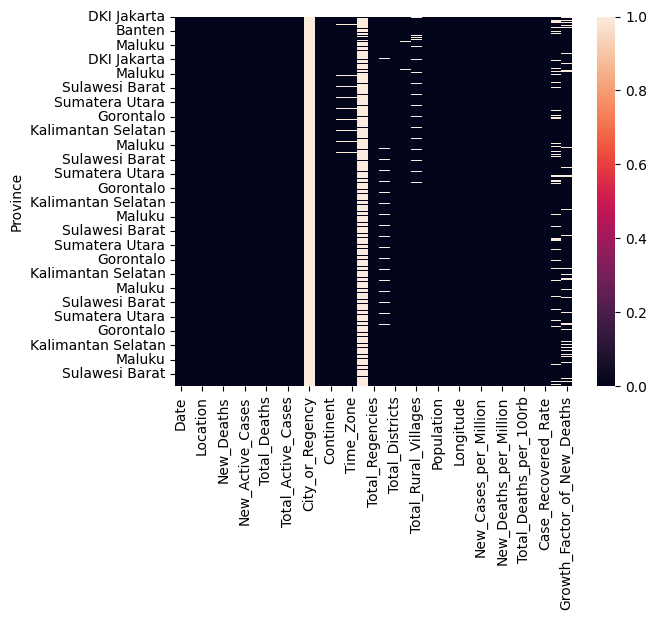

In [108]:
sns.heatmap(dataset.isna())

In [109]:
dataset = dataset[['Total_Cases','Total_Deaths','Total_Recovered','Population_Density',
        'Population','Total_Cases_per_Million','Total_Deaths_per_Million']]
        #Membuat dataframe baru dengan feature yang dipilih
dataset

,Total_Cases,Total_Deaths,Total_Recovered,Population_Density,Population,Total_Cases_per_Million,Total_Deaths_per_Million
Province,,,,,,,
DKI Jakarta,39,20.0,75.0,16334.31,10846145.0,3.60,1.84
DKI Jakarta,41,20.0,75.0,16334.31,10846145.0,3.78,1.84
NaN,2,0.0,0.0,138.34,265185520.0,0.01,0.00
Riau,1,0.0,1.0,69.80,6074100.0,0.16,0.00
DKI Jakarta,43,20.0,75.0,16334.31,10846145.0,3.96,1.84
...,...,...,...,...,...,...,...
Bengkulu,235,19.0,118.0,100.38,1999539.0,117.53,9.50
DKI Jakarta,22144,852.0,14108.0,16334.31,10846145.0,2041.65,78.55
Daerah Istimewa Yogyakarta,759,21.0,421.0,1158.90,3631015.0,209.03,5.78


In [111]:
#Menggantikan NaN menjadi nilai 0
dataset = dataset.fillna(0)

In [112]:
#Menambah kolom feature Fatality Rate dan Recovery Rate
dataset["Fatality_Rate"] = dataset.Total_Deaths / dataset.Total_Cases
dataset["Recovery_Rate"] = dataset.Total_Recovered / dataset.Total_Cases
dataset.head()

,Total_Cases,Total_Deaths,Total_Recovered,Population_Density,Population,Total_Cases_per_Million,Total_Deaths_per_Million,Fatality_Rate,Recovery_Rate
Province,,,,,,,,,
DKI Jakarta,39,20.0,75.0,16334.31,10846145.0,3.60,1.84,0.512821,1.923077
DKI Jakarta,41,20.0,75.0,16334.31,10846145.0,3.78,1.84,0.487805,1.829268
NaN,2,0.0,0.0,138.34,265185520.0,0.01,0.00,0.000000,0.000000
Riau,1,0.0,1.0,69.80,6074100.0,0.16,0.00,0.000000,1.000000
DKI Jakarta,43,20.0,75.0,16334.31,10846145.0,3.96,1.84,0.465116,1.744186


<Axes: >

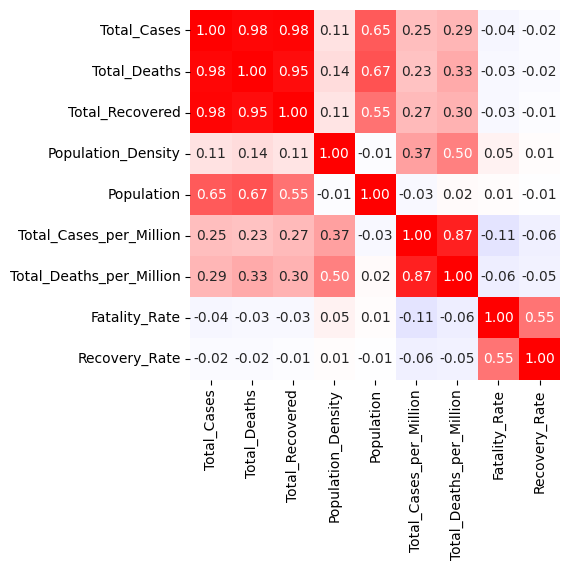

In [113]:
sns.heatmap(dataset.corr(),cmap="bwr",cbar=False,vmin=-1,vmax=1,annot=True,square=True, fmt =".2f")

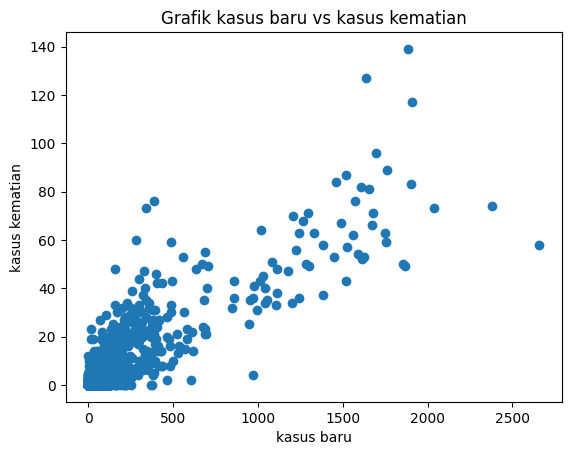

In [114]:
plt.scatter(X['New Cases'], X['New Deaths'], label='True Position')
plt.xlabel("kasus baru")
plt.ylabel("kasus kematian")
plt.title("Grafik kasus baru vs kasus kematian")
plt.show()

In [115]:
#Scaling dataset dengan MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset)
scaled_dataset = pd.DataFrame(scaler.transform(dataset),columns= dataset.columns)
scaled_dataset

,Total_Cases,Total_Deaths,Total_Recovered,Population_Density,Population,Total_Cases_per_Million,Total_Deaths_per_Million,Fatality_Rate,Recovery_Rate
0,0.000346,0.003851,0.001104,1.000000,0.040900,0.001763,0.023425,0.051282,0.017325
1,0.000364,0.003851,0.001104,1.000000,0.040900,0.001851,0.023425,0.048780,0.016480
2,0.000009,0.000000,0.000000,0.008469,1.000000,0.000005,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000015,0.004273,0.022905,0.000078,0.000000,0.000000,0.009009
4,0.000382,0.003851,0.001104,1.000000,0.040900,0.001940,0.023425,0.046512,0.015713
...,...,...,...,...,...,...,...,...,...
4701,0.002129,0.003659,0.001737,0.006145,0.007540,0.057566,0.120942,0.008085,0.004524
4702,0.201419,0.164067,0.207718,1.000000,0.040900,1.000000,1.000000,0.003848,0.005740
4703,0.006895,0.004044,0.006199,0.070949,0.013692,0.102383,0.073584,0.002767,0.004997
4704,0.011671,0.006547,0.009555,0.006421,0.004452,0.532677,0.366645,0.002648,0.004554


In [116]:
pca = PCA(n_components = 3,random_state = 42)
pca_data= pd.DataFrame(pca.fit_transform(scaled_dataset), columns=(["PC1","PC2", "PC3"]))
pca_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,4706.0,9.059193e-18,0.220398,-0.124577,-0.107201,-0.076382,-0.006000,1.557707
PC2,4706.0,2.264798e-18,0.196395,-0.422738,-0.040525,-0.027005,-0.015469,1.464957
PC3,4706.0,6.039462e-18,0.132434,-0.743946,-0.033691,-0.020274,0.026133,0.765499


In [120]:
x =pca_data["PC1"]
y =pca_data["PC2"]
z =pca_data["PC3"]
fig = px.scatter_3d(pca_data, x, y, z,color=dataset.index)
fig.show()

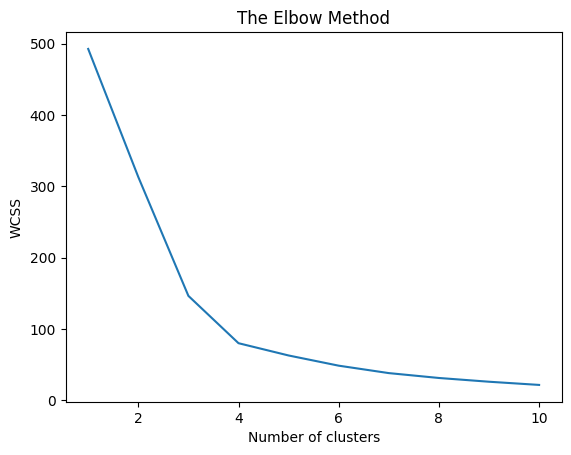

In [122]:
#menentukan KMeans dengan method elbow
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [123]:
#dapat KMeans = 3
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=42) #n_clusters merupakan Jumlah cluster yang dipilih
#dan random_state digunakan untuk mengontrol ke-random-an saat rerun kernel.
labels = kmeans.fit_predict(pca_data)
np.unique(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([0, 1, 2], dtype=int32)

In [126]:
x =pca_data["PC1"]
y =pca_data["PC2"]
z =pca_data["PC3"]
fig = px.scatter_3d(pca_data, x, y, z,color=labels)
fig.show()

In [129]:
 #masukan kolum kluster pada dataframe awal
dataset["Clusters"] = labels

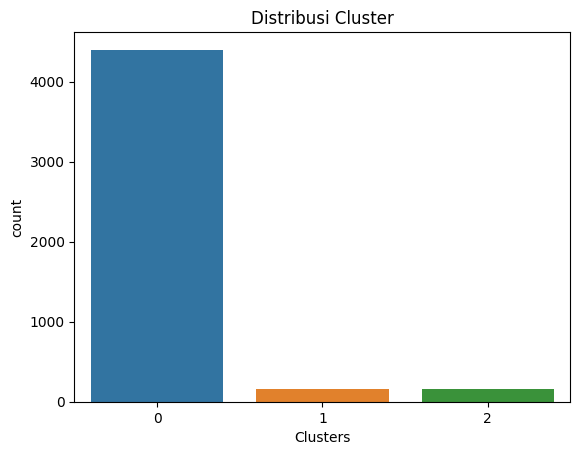

In [130]:
pl = sns.countplot(x=dataset["Clusters"])
pl.set_title("Distribusi Cluster")
plt.show()

In [132]:
Cluster1 = dataset[dataset['Clusters']==0]
Cluster2 = dataset[dataset['Clusters']==1]
Cluster3 = dataset[dataset['Clusters']==2]

In [136]:
list(Cluster1.index)

['Riau',
 'Jawa Barat',
 'Riau',
 'Jawa Barat',
 'Riau',
 'Jawa Barat',
 'Riau',
 'Banten',
 'Jawa Barat',
 'Riau',
 'Banten',
 'Jawa Barat',
 'Riau',
 'Banten',
 'Jawa Barat',
 'Jawa Tengah',
 'Riau',
 'Banten',
 'Jawa Barat',
 'Jawa Tengah',
 'Riau',
 'Banten',
 'Jawa Barat',
 'Jawa Tengah',
 'Riau',
 'Sulawesi Tenggara',
 'Bali',
 'Banten',
 'Jawa Barat',
 'Jawa Tengah',
 'Riau',
 'Sulawesi Tenggara',
 'Bali',
 'Banten',
 'Jawa Barat',
 'Jawa Tengah',
 'Riau',
 'Sulawesi Tenggara',
 'Bali',
 'Banten',
 'Jawa Barat',
 'Jawa Tengah',
 'Riau',
 'Sulawesi Tenggara',
 'Bali',
 'Banten',
 'Jawa Barat',
 'Jawa Tengah',
 'Kalimantan Timur',
 'Riau',
 'Sulawesi Tenggara',
 'Bali',
 'Banten',
 'Jawa Barat',
 'Jawa Tengah',
 'Kalimantan Timur',
 'Riau',
 'Sulawesi Tenggara',
 'Bali',
 'Banten',
 'Daerah Istimewa Yogyakarta',
 'Jawa Barat',
 'Jawa Tengah',
 'Kalimantan Timur',
 'Riau',
 'Sulawesi Tenggara',
 'Bali',
 'Banten',
 'Daerah Istimewa Yogyakarta',
 'Jawa Barat',
 'Jawa Tengah',
 'Kali

In [138]:
list(Cluster2.index)

['DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Jakarta',
 'DKI Ja

In [139]:
list(Cluster3.index)

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [142]:
dataset_mean = pd.concat([pd.DataFrame(dataset.mean().drop('Clusters'), columns=['mean']),
                   dataset.groupby('Clusters').mean().T], axis=1)
dataset_dev_rel = dataset_mean.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
dataset_dev_rel.drop(columns=['mean'], inplace=True)
dataset_mean.drop(columns=['mean'], inplace=True)

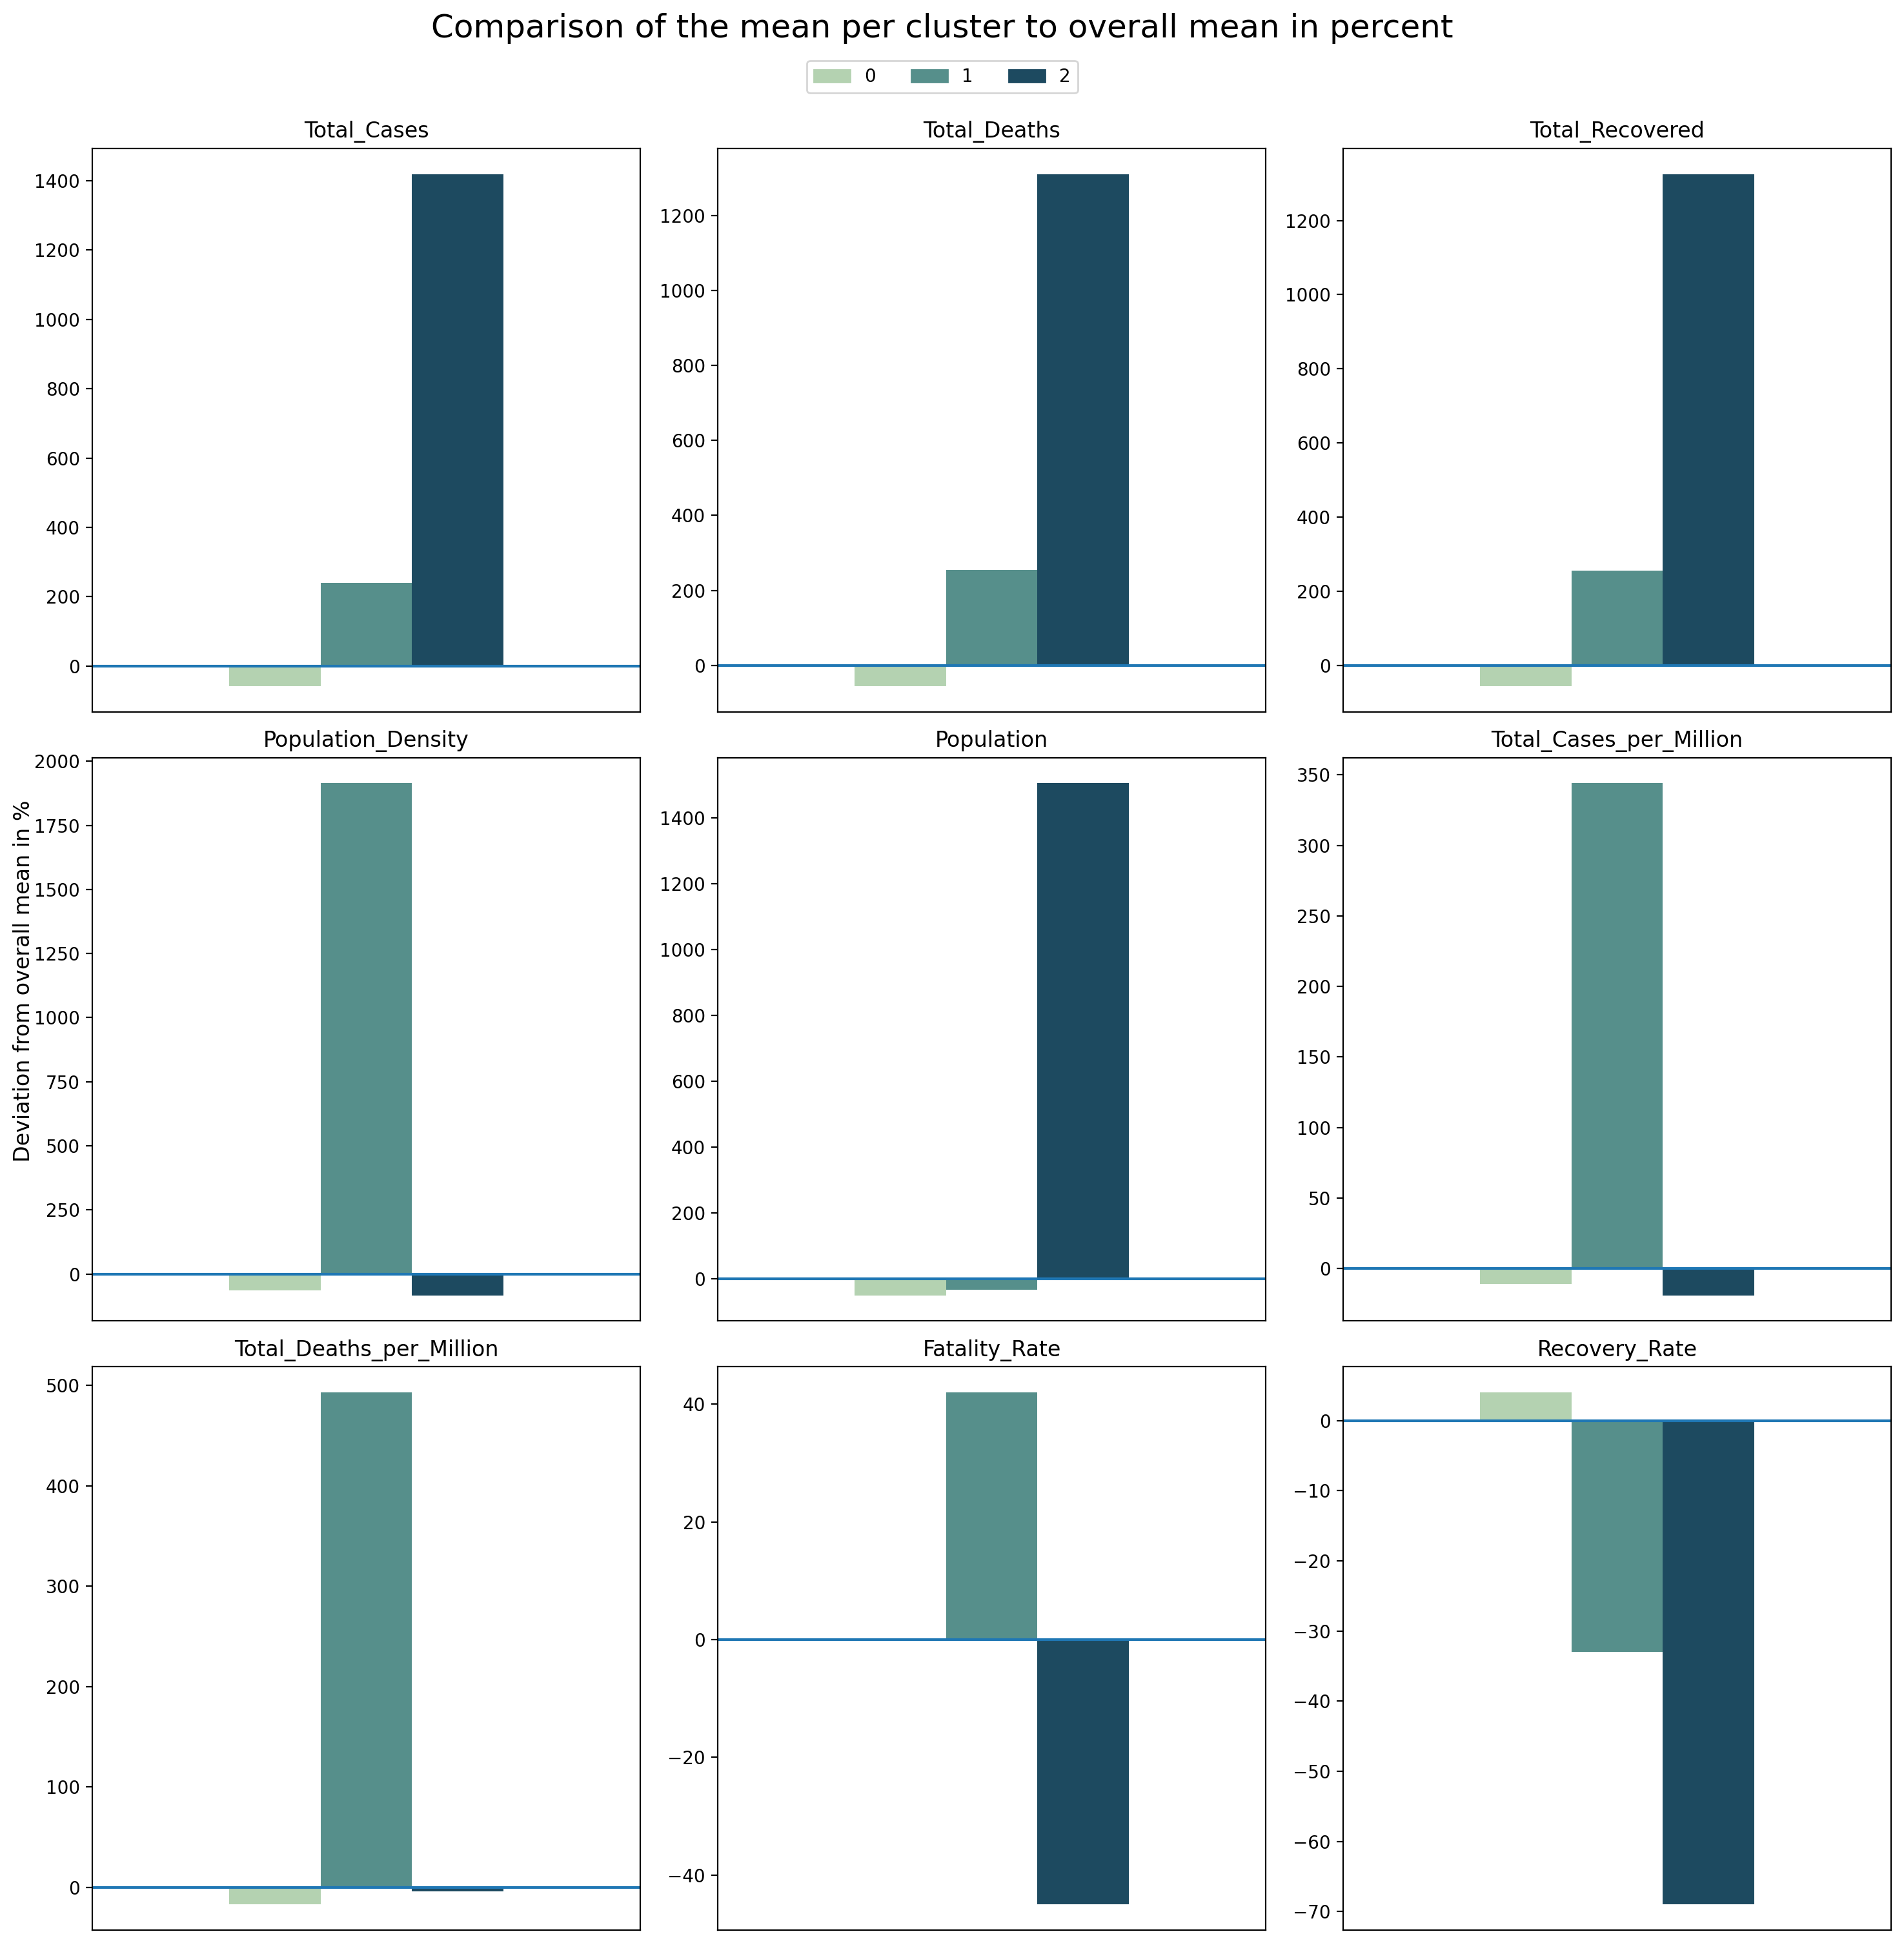

In [145]:
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']
def cluster_comparison_bar(dataset_comparison, colors, deviation=True ,title="Cluster results"):

    features = dataset_comparison.index
    ncols = 3
    nrows = len(features) // ncols + (len(features) % ncols > 0)
    fig = plt.figure(figsize=(15,15), dpi=200)
    for n, feature in enumerate(features):
        # create chart
        ax = plt.subplot(nrows, ncols, n + 1)
        dataset_comparison[dataset_comparison.index==feature].plot(kind='bar', ax=ax, title=feature,
                                                             color=colors[0:dataset.Clusters.nunique()],
                                                             legend=False
                                                            )
        plt.axhline(y=0)
        x_axis = ax.axes.get_xaxis()
        x_axis.set_visible(False)

    c_labels = dataset_comparison.columns.to_list()
    c_colors = colors[0:3]
    mpats = [mpatches.Patch(color=c, label=l) for c,l in list(zip(colors[0:dataset.Clusters.nunique()],
                                                                  dataset_comparison.columns.to_list()))]

    fig.legend(handles=mpats,
               ncol=ncols,
               loc="upper center",
               fancybox=True,
               bbox_to_anchor=(0.5, 0.98)
              )
    axes = fig.get_axes()

    fig.suptitle(title, fontsize=18, y=1)
    fig.supylabel('Deviation from overall mean in %')
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

cluster_comparison_bar(dataset_dev_rel, cluster_colors, title="Comparison of the mean per cluster to overall mean in percent")

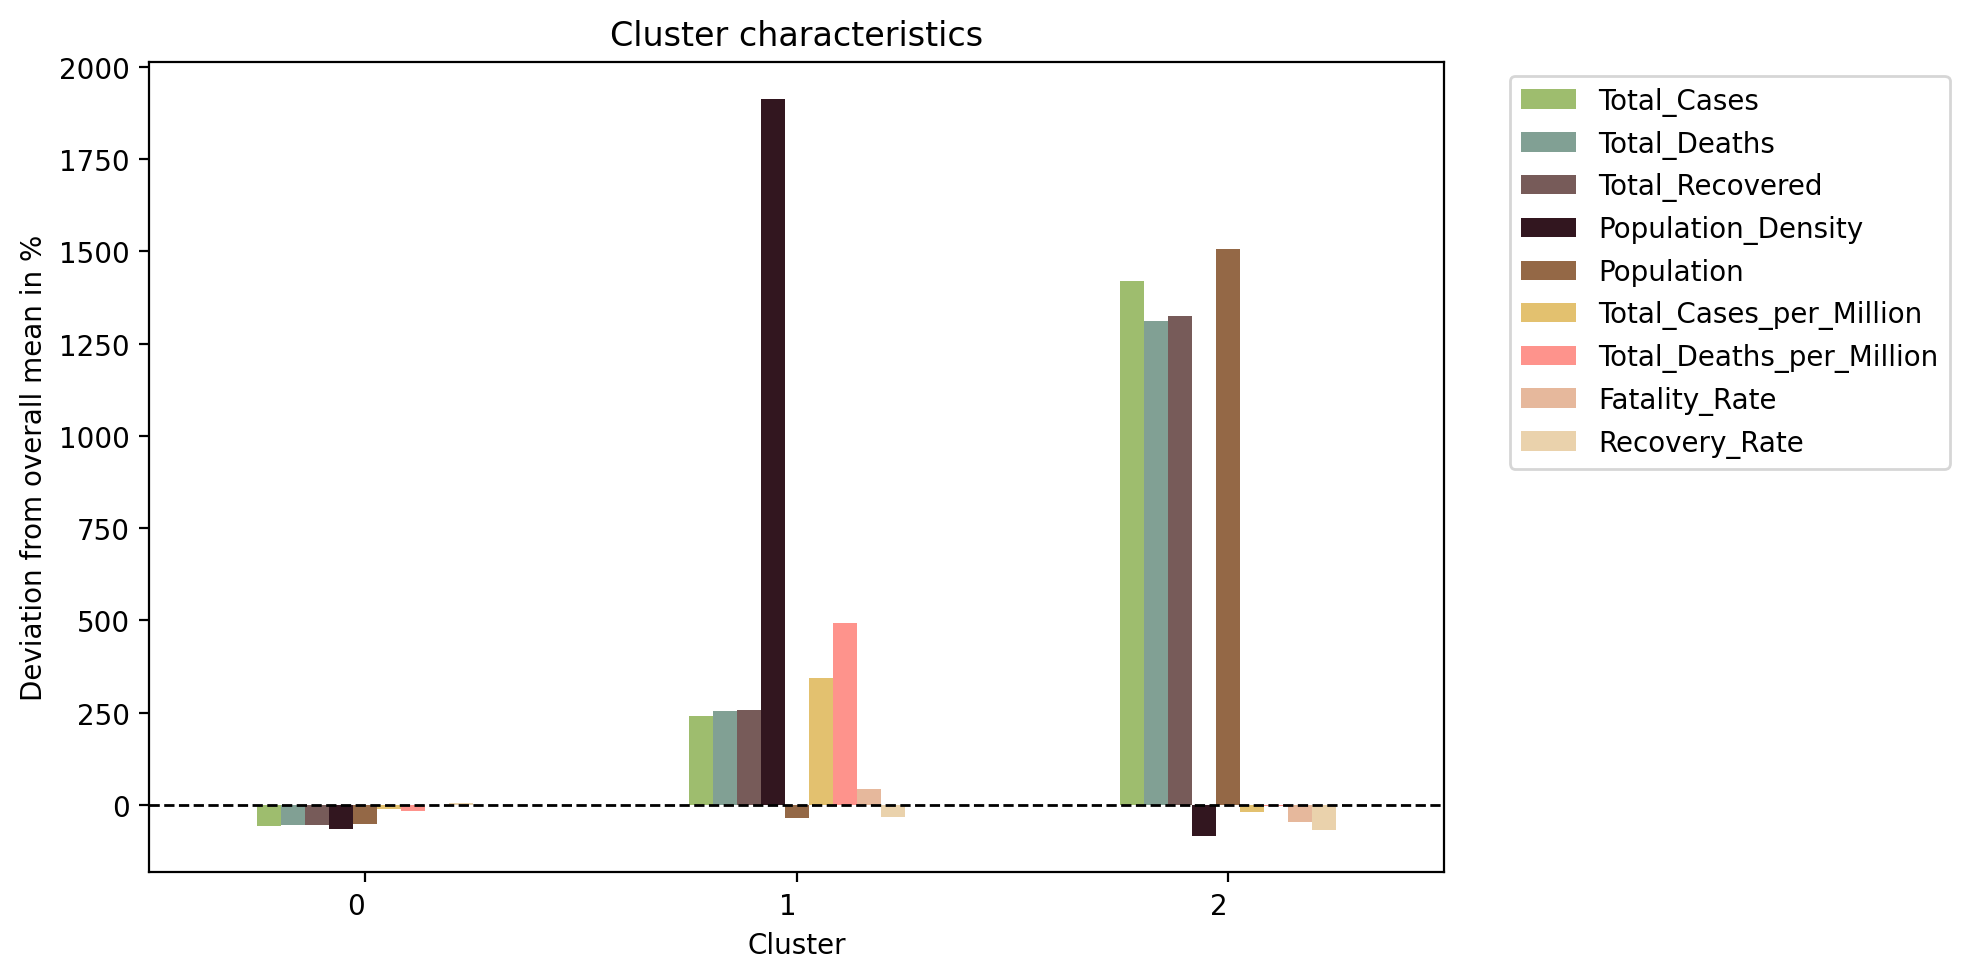

In [146]:
colors = ['#9EBD6E','#81a094','#775b59','#32161f', '#946846', '#E3C16F', '#fe938c', '#E6B89C','#EAD2AC',
          '#DE9E36', '#4281A4','#37323E','#95818D'
         ]

fig = plt.figure(figsize=(10,5), dpi=200)
dataset_dev_rel.T.plot(kind='bar',
                       ax=fig.add_subplot(),
                       title="Cluster characteristics",
                       color=colors,
                       xlabel="Cluster",
                       ylabel="Deviation from overall mean in %"
                      )
plt.axhline(y=0, linewidth=1, ls='--', color='black')
plt.legend(bbox_to_anchor=(1.04,1))
fig.autofmt_xdate(rotation=0)
plt.tight_layout()
plt.show()